In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikit_posthocs as sp
from scipy import stats
import Orange

In [220]:
df = pd.read_csv("resultsHV.csv")

df["difference"] *= 100
df

,Unnamed: 0,instance,default,config,configuration,difference,solver
0,0,DTLZ4,120.207903,120.212978,-mu '344' -mutGauss_p '0.33471148879414026' -...,0.004222,SMS-EMOA
1,1,ZDT2,120.323894,120.194329,-mu '275' -mutator 'mutUniform' -recSBX_eta '...,-0.107680,SMS-EMOA
2,2,MMF8,0.210780,0.210743,-mu '677' -mutPolynomial_eta '88' -mutPolynom...,-0.017773,SMS-EMOA
3,3,ZDT4,120.661630,120.661630,-mu '100' -mutPolynomial_eta '10' -mutPolynom...,0.000000,SMS-EMOA
4,4,MMF1z,0.662913,0.660138,-mu '434' -mutGauss_p '0.8142044931929042' -m...,-0.418678,SMS-EMOA
...,...,...,...,...,...,...,...
256,256,MMF5,0.487173,0.669481,-cf '360' -mu '956' -mut_eta '888' -p '0.6435...,37.421739,DN-NSGAII
257,257,DTLZ6,118.350530,118.962126,-cf '34' -mu '684' -mut_eta '62' -p '0.167945...,0.516766,DN-NSGAII
258,258,MMF4,0.259731,0.259731,-cf '10' -mu '100' -mut_eta '25' -p '0.7' -re...,0.000000,DN-NSGAII
259,259,MMF1z,0.387649,0.656521,-cf '204' -mu '678' -mut_eta '343' -p '0.7923...,69.359522,DN-NSGAII


In [221]:
df.groupby("solver")["difference"].describe()

,count,mean,std,min,25%,50%,75%,max
solver,,,,,,,,
DN-NSGAII,31.0,9.435017,1.839653e+01,-20.035990,0.000000,3.256846,18.723066,6.935952e+01
MOEAD,31.0,-3.971919,1.788555e+01,-99.778814,0.000000,0.000000,0.000000,0.000000e+00
MOGSA,32.0,39.674937,2.962998e+02,-100.000012,-18.452241,-0.272403,0.934720,1.656544e+03
MOLE,31.0,320206.410059,1.782835e+06,-100.000012,-0.216539,0.896759,6.887533,9.926405e+06
NSGA-II,32.0,0.813011,2.730513e+00,-4.725112,0.000000,0.076151,0.927702,1.025707e+01
SMS-EMOA,32.0,2.167202,6.784559e+00,-0.565143,-0.050297,0.007259,0.672921,3.255505e+01
higamo,32.0,95.163740,4.626323e+02,-2.379355,0.349641,7.432237,16.879001,2.627865e+03
omnioptimizer,32.0,204.309700,5.374914e+02,-0.061173,0.345099,65.061682,172.035055,3.022995e+03


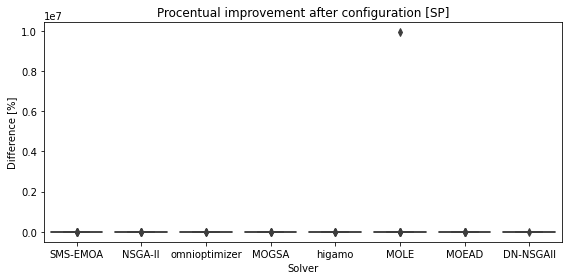

In [222]:
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(x="solver",y="difference",data=df)

ax.set_title("Procentual improvement after configuration [SP]")
ax.set_ylabel("Difference [%]")
ax.set_xlabel("Solver")
plt.tight_layout()
plt.savefig("boxplot.pdf")

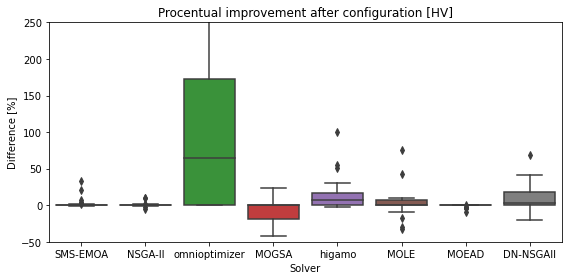

In [223]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x="solver",y="difference",data=df)

ax.set_title("Procentual improvement after configuration [HV]")
ax.set_ylabel("Difference [%]")
ax.set_xlabel("Solver")
ax.set_ylim(-50,250)
plt.tight_layout()
plt.savefig("boxplotz.pdf")
plt.show()

SMS-EMOA


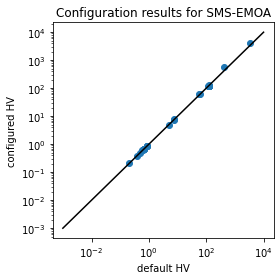

NSGA-II


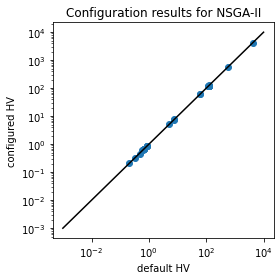

omnioptimizer


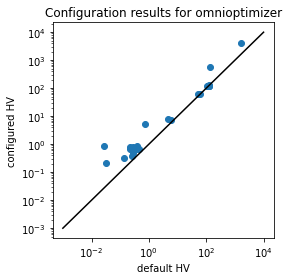

MOGSA


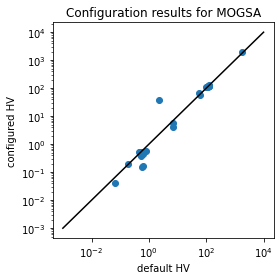

higamo


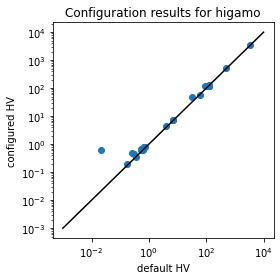

MOLE


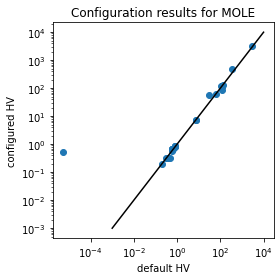

MOEAD


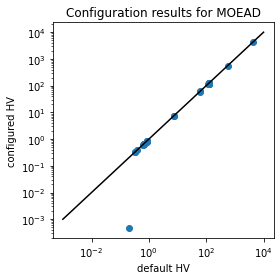

DN-NSGAII


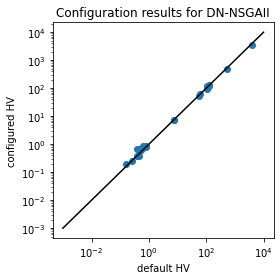

In [224]:
for solver in df["solver"].unique():
    print(solver)
    result_df = df[df["solver"] == solver]
    
    fig, ax = plt.subplots(figsize=(4,4))
    ax.scatter(result_df["default"],result_df["config"])
    ax.plot([0.001,10000],[0.001,10000],c="black")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("default HV")
    ax.set_ylabel("configured HV")
    ax.set_title(f"Configuration results for {solver}")
    plt.tight_layout()
    plt.savefig(f"comp_{solver}.pdf")
    plt.show()
        

In [225]:
gdf = df.groupby(["instance","solver"])["config"].sum().unstack()
display(gdf)

gdf[gdf < 0] = np.NaN
gdf = gdf.drop(columns="DN-NSGAII")
gdf = gdf.dropna()

print(len(gdf))


solver,DN-NSGAII,MOEAD,MOGSA,MOLE,NSGA-II,SMS-EMOA,higamo,omnioptimizer
instance,,,,,,,,
BiObjBBOB1,3475.100551,4147.271492,1.937222e+03,3227.173028,4129.269206,4147.171351,3628.694692,4255.851050
BiObjBBOB2,481.885252,545.305827,6.954063e+01,502.808328,566.928450,563.065730,508.212141,588.039620
BiObjBBOB3,52.537150,57.899019,3.947947e+01,54.868389,60.041210,59.904294,48.900402,60.185162
DTLZ1,120.011408,120.871634,1.199415e+02,85.588901,120.874224,120.873906,120.344719,120.749326
DTLZ2,120.180254,120.209809,1.200439e+02,120.210531,120.211186,120.167442,120.207796,120.208167
DTLZ3,NaN,120.205163,1.092005e+02,117.284265,118.771341,119.820057,119.011169,120.188158
DTLZ4,116.103876,120.207278,1.097874e+02,116.496650,120.210591,120.212978,120.126642,120.208249
DTLZ5,114.422594,120.209809,1.200439e+02,120.209374,120.207295,120.213211,120.208113,120.213835
DTLZ6,118.962126,120.164200,1.200021e+02,120.193811,120.118017,119.483338,120.205116,NaN


27


cd= 3.404648672063536


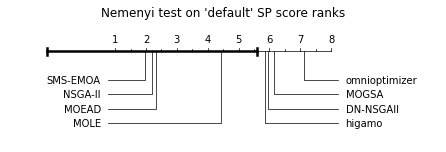

cd= 3.404648672063536


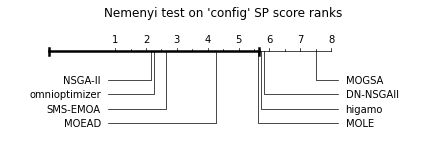

In [226]:
for target in ["default", "config"]:
    gdf = df.groupby(["instance","solver"])[target].sum().unstack()
    #gdf = gdf.drop(columns="DN-NSGAII")
    
    #gdf = gdf.drop(columns="DN-NSGAII").dropna()
    gdf = gdf[gdf > 0].dropna()
    
    gdf = gdf.fillna(np.inf)
    
    ranks = {}
    for key, row in gdf.iterrows():
        row = row.to_dict()
        ranks[key] = {k: n+1 for n, (k, v) in enumerate(sorted(row.items(), key=lambda item: item[1])[::-1])}

    rdf = pd.DataFrame(ranks)
    ranks = rdf.mean(axis=1)

    names = list(ranks.keys())
    avranks = ranks.tolist()
    
    cd = Orange.evaluation.compute_CD(avranks, len(rdf), alpha="0.1", test="nemenyi") #tested on 14 datasets 
    print(f"cd=",cd)
    Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5, cdmethod=0)
    plt.title(f"Nemenyi test on '{target}' SP score ranks")
    plt.show()

In [227]:
for solver, gdf in df.groupby("solver"):
    print(solver)
    for _,r in gdf.iterrows():
        print("\t",r["configuration"].strip())

DN-NSGAII
	 -cf '10' -mu '100' -mut_eta '25' -p '0.7' -rec_eta '15'
	 -cf '2' -mu '598' -mut_eta '235' -p '0.9208459166717533' -rec_eta '99'
	 -cf '83' -mu '688' -mut_eta '416' -p '0.6754176865091' -rec_eta '36'
	 -cf '23' -mu '656' -mut_eta '38' -p '0.04999461145270834' -rec_eta '634'
	 -cf '97' -mu '800' -mut_eta '532' -p '0.27778067847436705' -rec_eta '122'
	 -cf '65' -mu '918' -mut_eta '166' -p '0.5556155806851875' -rec_eta '885'
	 -cf '10' -mu '100' -mut_eta '25' -p '0.7' -rec_eta '15'
	 -cf '197' -mu '473' -mut_eta '65' -p '0.7644628971048726' -rec_eta '125'
	 -cf '10' -mu '100' -mut_eta '25' -p '0.7' -rec_eta '15'
	 -cf '292' -mu '615' -mut_eta '255' -p '0.9570692147222116' -rec_eta '549'
	 -cf '65' -mu '918' -mut_eta '166' -p '0.5556155806851875' -rec_eta '885'
	 -cf '476' -mu '817' -mut_eta '87' -p '0.1871611556337094' -rec_eta '228'
	 -cf '83' -mu '688' -mut_eta '416' -p '0.6754176865091' -rec_eta '36'
	 -cf '197' -mu '473' -mut_eta '65' -p '0.7644628971048726' -rec_eta '125'

In [118]:
gdf = gdf.fillna(np.inf)
#{k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
ranks = {}

for key, row in gdf.iterrows():
    row = row.to_dict()
    ranks[key] = {k: n+1 for n, (k, v) in enumerate(sorted(row.items(), key=lambda item: item[1]))}
    
rdf = pd.DataFrame(ranks)
ranks = rdf.mean(axis=1)

list(ranks.keys())

['MOEAD', 'NSGA-II', 'SMS-EMOA', 'MOGSA', 'MOLE', 'higamo', 'omnioptimizer']

cd= 2.490456068388163


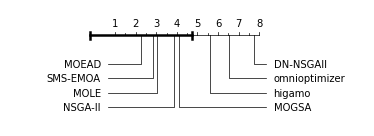

In [98]:
names = list(ranks.keys())
avranks = ranks.tolist()

cd = Orange.evaluation.compute_CD(avranks, 14, alpha="0.05", test="bonferroni-dunn") #tested on 14 datasets 
print("cd=",cd)
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=5, textspace=1.5, cdmethod=0)

In [99]:
rdf

,BiObjBBOB1,BiObjBBOB2,BiObjBBOB3,DTLZ1,DTLZ2,DTLZ3,DTLZ4,DTLZ5,DTLZ6,DTLZ7,...,MMF5,MMF6,MMF7,MMF8,MMF9,ZDT1,ZDT2,ZDT3,ZDT4,ZDT6
MOEAD,1,2,8,1,2,1,4,2,2,1,...,4,2,3,1,1,1,2,1,1,1
NSGA-II,2,4,2,3,5,2,5,4,3,4,...,3,3,5,3,5,4,3,3,3,8
SMS-EMOA,3,3,1,2,4,3,3,3,4,3,...,2,1,4,4,3,2,4,2,4,2
MOGSA,4,5,4,5,1,7,2,1,6,5,...,5,4,1,5,2,5,8,6,5,3
MOLE,5,1,3,4,3,4,1,8,1,2,...,1,5,2,2,4,3,1,4,2,4
higamo,6,6,5,6,7,5,6,6,7,8,...,6,6,7,6,6,7,6,7,6,6
omnioptimizer,7,7,6,7,6,6,7,5,5,6,...,7,7,6,7,7,6,5,5,7,5
DN-NSGAII,8,8,7,8,8,8,8,7,8,7,...,8,8,8,8,8,8,7,8,8,7
